In [4]:
from feature_engineering.processing import *
from feature_engineering.engineering import *
from joblib import load
import warnings
warnings.filterwarnings('ignore')
processing_pipeline = load('../feature_engineering/pipelines/processing_pipeline.joblib')
engineering_pipeline = load('../feature_engineering/pipelines/engineering_pipeline.joblib')

In [5]:
X_train = pd.read_csv('../data/orig_train.csv')

y_train = X_train['DEFAULT_FLAG']
X_train.drop(columns=['DEFAULT_FLAG'], inplace=True)

processing_pipeline.fit(X_train)
X_train = processing_pipeline.transform(X_train)
engineering_pipeline.fit(X_train)
X_train = engineering_pipeline.transform(X_train)

In [6]:
X_val = pd.read_csv('../data/orig_valid.csv')

y_val = X_val['DEFAULT_FLAG']
X_val.drop(columns=['DEFAULT_FLAG'], inplace=True)

X_val = processing_pipeline.transform(X_val)
X_val = engineering_pipeline.transform(X_val)

In [8]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier

estimators = [
    ('rf', RandomForestClassifier(n_estimators=1000, min_samples_split=2,
                                  min_samples_leaf=1, max_features='sqrt', max_depth=None)),
    ('xgb', XGBClassifier(max_depth=6, gamma=0.19, min_child_weight=0.25,
                          colsample_bytree=0.55, subsample=1))                              
]

final_model = StackingClassifier(estimators=estimators)
final_model.fit(X_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=1000)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.55,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=0.19,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=6,
                                              max_leaves=None,
                                              min_child_weight=0.25,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))])

In [9]:
rfc = estimators[0][1]
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [10]:
import shap
shap.initjs()

In [12]:
explainer = shap.TreeExplainer(rfc)
shap_values = explainer(X_train[0:1000])

In [17]:
shap_values_class1 = shap_values[:,:,1]
shap_values_class0 = shap_values[:,:,0]

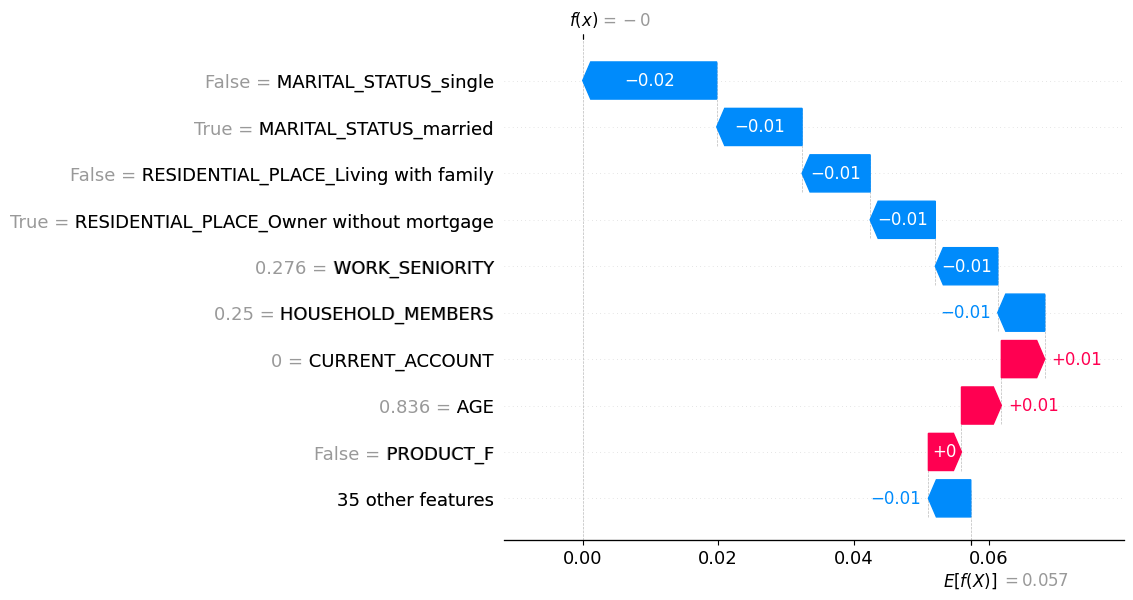

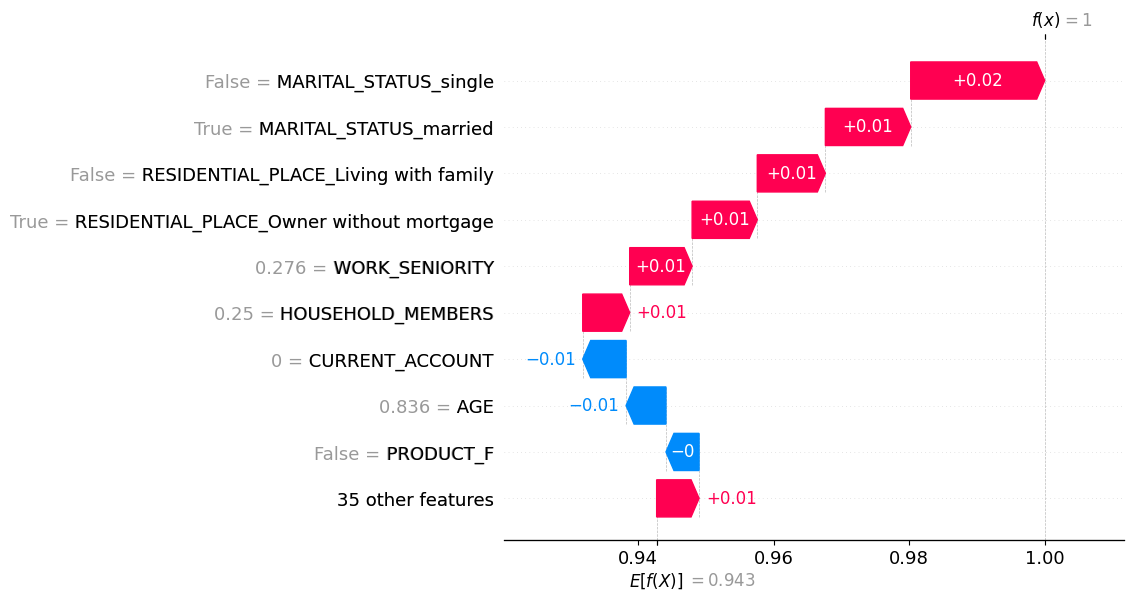

In [18]:
shap.plots.waterfall(shap_values_class1[0])
shap.plots.waterfall(shap_values_class0[0])

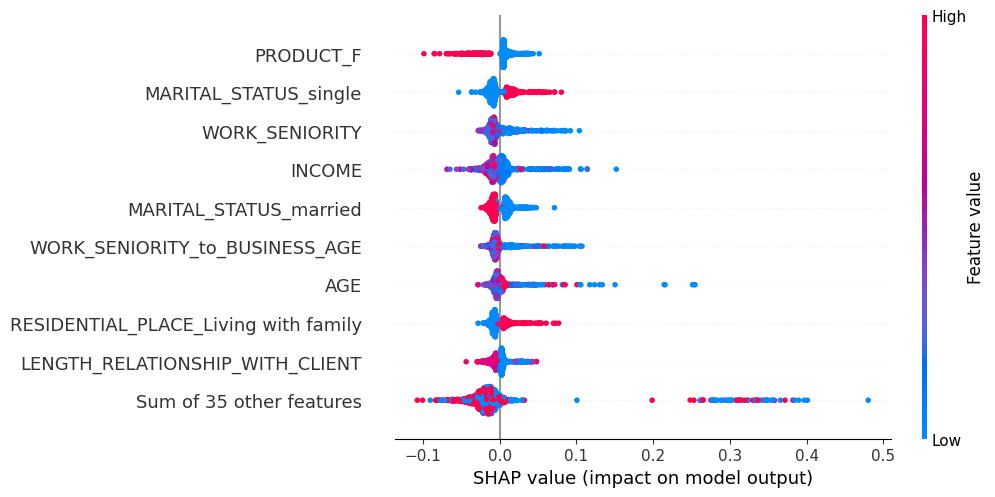

In [20]:
shap.plots.beeswarm(shap_values_class1)

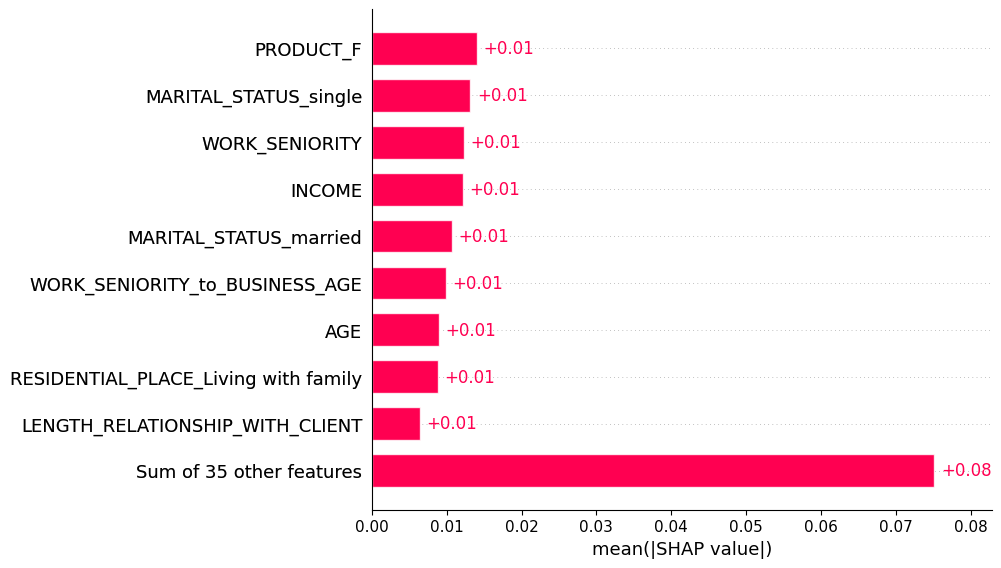

In [24]:
shap.plots.bar(shap_values_class1)